<a href="https://colab.research.google.com/github/donguyenquynhnhu/Public/blob/main/DoNguyenQuynhNhu_ANN_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [20/100], loss: 0.6049
Epoch [40/100], loss: 0.5641
Epoch [60/100], loss: 0.4728
Epoch [80/100], loss: 0.3899
Epoch [100/100], loss: 0.3316
Độ chính xác: 83.33%


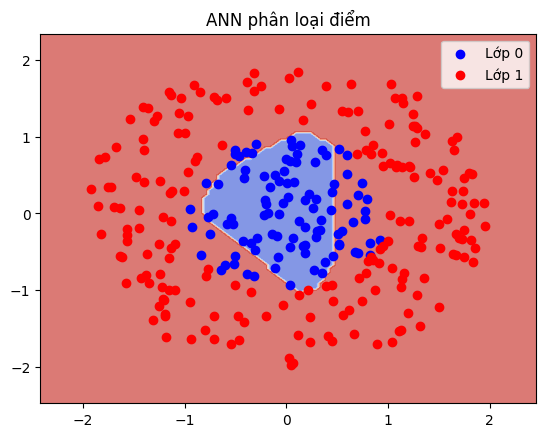

In [ ]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)


# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)


# Xây dựng mô hình ANN cơ bản
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")



# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")


# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()




Phần 1: Code và câu trả lời cho "Thay đổi cấu trúc ANN".

In [ ]:
class ANN_layers(nn.Module):
    def __init__(self):
        super(ANN_layers, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Lớp ẩn 1: 8 nút
        self.layer2 = nn.Linear(8, 6)  # Lớp ẩn 2: 6 nút
        self.relu = nn.ReLU()
        self.output = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Huấn luyện mô hình 2 lớp ẩn
model_2layers = ANN_layers()
optimizer = optim.Adam(model_2layers.parameters(), lr=0.01)

for epoch in range(epochs):
    model_2layers.train()
    optimizer.zero_grad()
    outputs = model_2layers(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Đánh giá
model_2layers.eval()
with torch.no_grad():
    y_pred = model_2layers(X_test)
    y_pred = (y_pred > 0.5).float()
    accuracy_2layers = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    final_loss_2layers = criterion(model_2layers(X_train), y_train).item()


Phần 2: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa".

In [ ]:
class ANN_BCEWithLogits(nn.Module):
    def __init__(self):
        super(ANN_BCEWithLogits, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)  # Không dùng Sigmoid ở đầu ra

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)  # Output raw logits
        return x

# Khởi tạo mô hình và hàm mất mát mới
model_bce_logits = ANN_BCEWithLogits()
criterion_logits = nn.BCEWithLogitsLoss()  # Thay đổi hàm mất mát
optimizer = optim.Adam(model_bce_logits.parameters(), lr=0.01)

# Huấn luyện
for epoch in range(epochs):
    model_bce_logits.train()
    optimizer.zero_grad()
    outputs = model_bce_logits(X_train)
    loss = criterion_logits(outputs, y_train)
    loss.backward()
    optimizer.step()

# Đánh giá
model_bce_logits.eval()
with torch.no_grad():
    y_pred = torch.sigmoid(model_bce_logits(X_test))  # Áp dụng sigmoid khi đánh giá
    y_pred = (y_pred > 0.5).float()
    accuracy_logits = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    final_loss_logits = criterion_logits(model_bce_logits(X_train), y_train).item()

In [ ]:
class ANN_SGD(nn.Module):
    def __init__(self):
        super(ANN_SGD, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình với SGD
model_sgd = ANN_SGD()
criterion = nn.BCELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)  # Sử dụng SGD

# Huấn luyện
losses_sgd = []
for epoch in range(epochs):
    model_sgd.train()
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_sgd.step()
    losses_sgd.append(loss.item())

# Đánh giá
model_sgd.eval()
with torch.no_grad():
    y_pred = model_sgd(X_test)
    y_pred = (y_pred > 0.5).float()
    accuracy_sgd = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    final_loss_sgd = criterion(model_sgd(X_train), y_train).item()

Phần 3: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".

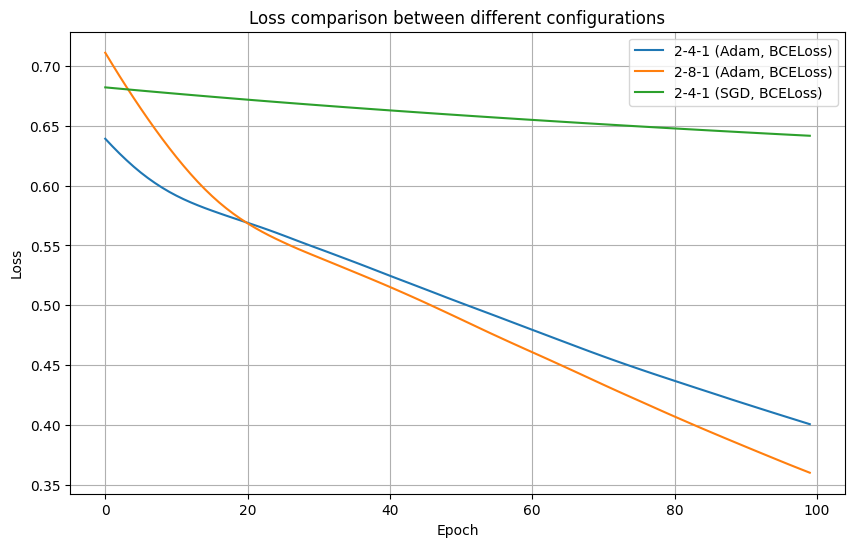

In [ ]:
# Huấn luyện mô hình ban đầu (2-4-1, Adam, BCELoss)
model_original = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_original.parameters(), lr=0.01)
losses_original = []

for epoch in range(epochs):
    model_original.train()
    optimizer.zero_grad()
    outputs = model_original(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses_original.append(loss.item())


# Định nghĩa class ANN_8nodes (mô hình 2-8-1)
class ANN_8nodes(nn.Module):
    def __init__(self):
        super(ANN_8nodes, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Lớp ẩn với 8 nút
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Sau đó mới sử dụng class này
model_8nodes = ANN_8nodes()
# Huấn luyện mô hình 2-8-1 (Adam, BCELoss)
model_8nodes = ANN_8nodes()
optimizer = optim.Adam(model_8nodes.parameters(), lr=0.01)
losses_8nodes = []

for epoch in range(epochs):
    model_8nodes.train()
    optimizer.zero_grad()
    outputs = model_8nodes(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses_8nodes.append(loss.item())

# Huấn luyện mô hình 2-4-1 (SGD, BCELoss)
model_sgd = ANN_SGD()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
losses_sgd = []

for epoch in range(epochs):
    model_sgd.train()
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_sgd.step()
    losses_sgd.append(loss.item())

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(losses_original, label='2-4-1 (Adam, BCELoss)')
plt.plot(losses_8nodes, label='2-8-1 (Adam, BCELoss)')
plt.plot(losses_sgd, label='2-4-1 (SGD, BCELoss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss comparison between different configurations')
plt.legend()
plt.grid(True)
plt.show()